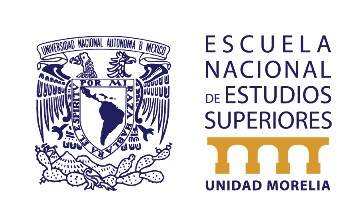
<h2><center>Licenciatura en Tecnologías para la Información en Ciencias</center></h2>
<h2><center>Introducción a la Ciencia de Datos</center></h2>
<h2><center>Proyecto 2: Métricas y validación cruzada</center></h2>
<h2><center>Luis David Huante García</center></h2>
<h2><center>Matrícula: 420138905</center></h2>
<h2><center>A 5 de abril de 2022</center></h2>



## Introducción


Una manera muy efectiva de obtener inferencias y conclusiones de cualquier conjunto de datos es a través de su minucioso y detallado análisis usando modelos de aprendizaje automático, ya que las diferentes técnicas y estrategias nos permiten realizar predicciones a partir de distintos parámetros que nosotros podemos ajustar dependiendo de la necesidad presentada. En este caso se deben plantear tres modelos de aprendizaje automático supervisado para realizar la clasificación de países en ingreso bajo, medio y alto conforme a su producto interno bruto (GDP por sus siglas en inglés) utilizando validación cruzada de 5 partes. De la misma manera, se determinará el éxito del modelo usando las métricas de Exactitud, Precisión, Sensibilidad y F1.

## Código

In [276]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [277]:
warnings.filterwarnings('ignore')

In [216]:
data = pd.read_excel('cia_países.xlsx', index_col=None)

Tenemos el dataframe:

In [217]:
data

,Name,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,Afghanistan,Asia,652230,37466414,2065,23.90,23.90,7.0,7.8700,4.717013e+06,13.50,46.0,34903.0,1.20
1,Akrotiri,Middle East,123,18195,0,NaN,NaN,NaN,0.8850,NaN,NaN,1.0,NaN,NaN
2,Albania,Europe,28748,3088385,13965,5.83,5.83,71.8,102.4300,2.196613e+06,71.85,3.0,3945.0,1.30
3,Algeria,Africa,2381740,43576691,11511,11.70,11.70,27.5,131.0850,2.481953e+07,59.58,149.0,104000.0,6.00
4,American Samoa,Oceania,224,46366,11200,29.80,29.80,12.2,1.0000,1.700000e+04,31.30,3.0,241.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,West Bank,Middle East,5860,2949246,6220,27.90,27.90,24.4,3.6060,2.673000e+06,57.40,2.0,4686.0,NaN
250,World,World,510.072 million sq km,7772850805,17500,7.70,7.70,67.2,NaN,3.960000e+09,51.00,41820.0,64285009.0,2.21
251,Yemen,Middle East,527968,30399243,2500,27.00,27.00,74.5,275.0000,7.659884e+06,26.72,57.0,71300.0,4.30
252,Zambia,Africa,752618,19077816,3470,15.00,15.00,63.1,21.0650,2.351646e+06,14.30,88.0,67671.0,1.20


#### Comenzamos con el proceso de Data Cleaning y Data Wrangling

In [218]:
data = data.fillna(0)

Identifqué dos columnas con datos que estaban fuera de formato, "Population" y "Area (km2), por lo que es necesario realizar las modificaciones correspondientes.

In [219]:
data["Population"].unique()

array([37466414, 18195, 3088385, 43576691, 46366, 85645, 33642646, 18403,
       'no', 99175, 45864941, 3011609, 120917, 25809973, 8884864,
       10282283, 352655, 1526929, 164098818, 301865, 9441842, 11778842,
       405633, 13301694, 72084, 857423, 11758869, 3824782, 2350667,
       'uninhabited', 213445417, 37891, 471103, 6919180, 21382659,
       57069099, 12241065, 589451, 17304363, 28524175, 37943231, 63131,
       5357984, 17414108, 18307925, 1397897720, 2205, 596, 50355650,
       864335, 105044646, 5417414, 8327, 5151140, 28088455, 4208973,
       11032343, 151885, 1281506, 10702596, 5894687, 15500, 938413, 74584,
       10597348, 17093159, 106437241, 6528135, 857008, 6147398, 1220042,
       1113276, 110871031, 450131902, 3198, 51943, 939535, 5587442,
       68084217, 297154, 2284912, 2221301, 4933674, 79903481, 32372889,
       29516, 10569703, 57799, 113570, 168801, 17422821, 67334, 12877894,
       1976187, 787971, 11198240, 1000, 9346277, 7263234, 9728337, 354234,
      

In [220]:
data["Area (km²)"].unique()

array([652230, 123, 28748, 2381740, 224, 468, 1246700, 91, 14.2, 443,
       2780400, 29743, 180, 5, 7741220, 83871, 86600, 13880, 760, 148460,
       430, 207600, 30528, 22966, 112622, 54, 38394, 1098581, 51197,
       581730, 49, 8515770, 60, 151, 5765, 110879, 274200, 676578, 27830,
       4033, 181035, 475440, 9984670, 264, 622984, 1.284, 756102, 9596960,
       135, 6, 14, 1138910, 2235, 2344858, 342000, 236, 3, 51100, 322463,
       56594, 110860, 444, 9251, 78867, 43094, 131, 23200, 751, 48670,
       283561, 1001450, 21041, 28051, 117600, 45228, 17364, 1104300,
       '4,236,351 sq km', 12173, 1393, 18274, 338145, 643801, 4167,
       'total', 267667, 11300, 69700, 357022, 238533, 7, 131957, 2166086,
       344, 544, 108889, 78, 245857, 36125, 214969, 27750, 412, 0, 112090,
       1108, 93028, 103000, 3287263, 1904569, 1648195, 438317, 70273, 572,
       21937, 301340, 10991, 377, 377915, 116, 89342, 2724900, 580367,
       811, 120538, 99720, 10887, 17818, 199951, 236800, 6458

In [230]:
data["Area (km²)"] = data["Area (km²)"].replace(["510.072 million sq km"],510072000000)
data["Area (km²)"] = data["Area (km²)"].replace(["4,236,351 sq km"], 4236351)

In [222]:
data["Population"]= data["Population"].replace(["no"], 0)
data["Population"]= data["Population"].replace(["uninhabited"], 0)

Pasamos ahora a eliminar datos atípicos y a crear el vector de etiquetas necesarias para el proceso de aprendizaje automático.

In [223]:
def clean_data(GDP):
    data = []
    labels = []
    to_drop = []
    index_counter = 0
    for i in GDP:
        data.append(i)
              
        if i < 50:
            to_drop.append(index_counter)
                    
        elif 50 <= i <= 5000:
            labels.append(1)
            
        elif 5000 < i < 25000:
            labels.append(2)
            
        elif i > 25000:
            labels.append(3)
        index_counter += 1
        
    return labels, to_drop, data

In [224]:
GDP = data['GDP (USD)']
LABELS = clean_data(GDP)[0]
DATA_TO_DROP = clean_data(GDP)[1]

Eliminamos los datos atípicos:

In [225]:
for i in DATA_TO_DROP:
    data.drop([i],axis=0, inplace = True)

In [227]:
data.drop(['Continent'], axis = 1, inplace = True)
data.drop(['Name'], axis = 1, inplace = True)

In [233]:
data

,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,6.522300e+05,3.746641e+07,2065,23.90,23.90,7.0,7.8700,4.717013e+06,13.50,46.0,34903.0,1.20
2,2.874800e+04,3.088385e+06,13965,5.83,5.83,71.8,102.4300,2.196613e+06,71.85,3.0,3945.0,1.30
3,2.381740e+06,4.357669e+07,11511,11.70,11.70,27.5,131.0850,2.481953e+07,59.58,149.0,104000.0,6.00
4,2.240000e+02,4.636600e+04,11200,29.80,29.80,12.2,1.0000,1.700000e+04,31.30,3.0,241.0,0.00
5,4.680000e+02,8.564500e+04,49900,3.70,3.70,41.0,0.8850,7.848300e+04,91.57,0.0,320.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
249,5.860000e+03,2.949246e+06,6220,27.90,27.90,24.4,3.6060,2.673000e+06,57.40,2.0,4686.0,0.00
250,5.100720e+11,7.772851e+09,17500,7.70,7.70,67.2,0.0000,3.960000e+09,51.00,41820.0,64285009.0,2.21
251,5.279680e+05,3.039924e+07,2500,27.00,27.00,74.5,275.0000,7.659884e+06,26.72,57.0,71300.0,4.30
252,7.526180e+05,1.907782e+07,3470,15.00,15.00,63.1,21.0650,2.351646e+06,14.30,88.0,67671.0,1.20


Aquí comenzamos a definir nuestros conjuntos de entrenamiento, etiquetas y demás para continuar el proceso de predicción. Hacemos la matriz de entrenamiento y nuestro vector de etiquetas

In [242]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [243]:
X_train = data
y_train = clean_data(GDP)[0]

[1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 1]

#### El primer modelo que usaremos será el de Stochastic Gradient Descent.

In [255]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [256]:
#Validación cruzada con 5 partes
cross_val_score(sgd_classifier, X_train, y_train, cv=5, scoring="accuracy")

array([0.52173913, 0.41304348, 0.43478261, 0.43478261, 0.4       ])

Tras crear el primer clasificador, podemos ver los valores cruzados

In [284]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train, cv=5)

#### Revisamos las métricas:

##### Accuracy

In [258]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.4410480349344978

##### Precision

In [259]:
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred,average='macro')

0.41006705712588065

##### Recall

In [260]:
from sklearn.metrics import recall_score
recall_score(y_train, y_train_pred,average='macro')

0.3581383822363204

##### F1

In [261]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred,average='macro')

0.2752492985051125

#### El segundo modelo que usaremos será el de Multinomial Naive Bayes

In [265]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)

#Validación cruzada con 5 partes
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)

##### Accuracy

In [268]:
accuracy_score(y_train, y_train_pred)

0.5851528384279476

##### Precision

In [269]:
precision_score(y_train, y_train_pred,average='macro')

0.7156511350059738

##### Recall

In [270]:
recall_score(y_train, y_train_pred,average='macro')

0.6579401268834258

##### F1

In [271]:
f1_score(y_train, y_train_pred,average='macro')

0.5464567819845582

#### Finalmente, el modelo que usaremos será el de Regresión Logística

In [278]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=5,random_state=42)
clf.fit(X_train , y_train)
y_train_pred = clf.predict(X_train)

In [279]:
#Validación cruzada con 5 partes
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)

##### Accuracy

In [280]:
accuracy_score(y_train, y_train_pred)

0.5021834061135371

##### Precision

In [281]:
precision_score(y_train, y_train_pred,average='macro')

0.5608465608465608

##### Recall

In [282]:
recall_score(y_train, y_train_pred,average='macro')

0.4201229183187946

##### F1

In [283]:
f1_score(y_train, y_train_pred,average='macro')

0.3760320139630484

## Conclusiones


Después de realizar todo el proceso de Data Wrangling y Data Cleaning, eliminando datos incosistentes y que no iban con el formato necesario, pude pasar a la parte de la clasificación. Ahí, después de usar los sistemas de Descenso de Gradiente Estocástico, Naive Bayes Multinomial y Regresión Logística, podemos ver que el Naive Bayes resultaba ganador en todas las métricas. 

Tras la realización de este trabajo pude comprender con mayor detalle el funcionamiento de los sistemas de clasificación y la manera en que se implementan, así como las dificultades que surgen al realizar todos los procesos necesarios para llegar a un resultado consistente. La limpieza de datos y el data wrangling no son procesos triviales, ya que un científico de datos que se pueda considerar hábil puede y debe dominar esta actividad, a pesar de que muchas veces resulte contraintuitiva o confusa la manera en que se debe proceder. Además, se debe tener un conocimiento suficiente del funcionamiento de diversos sistemas de clasificación y la manera en que deben ajustarse para poder llegar a resultados exitosos, ya que dichos sistemas varían generalmente en sus parámetros. Todo este conocimiento ahora adquirido puede ser usado para propoósitos multidisciplinarios de toda índole, lo cual considero, es altamente provechoso para la búsqueda de nuevo conocimiento.

## Referencias


1. N/A. (2021). pandas documentation mayo 28, 2022, de Pandas Sitio web: https://pandas.pydata.org/docs/#
1. N/A. (2021). scikit-learn documentation mayo 28, 2022, de SciKit-Learn Sitio web: https://scikit-learn.org/stable/index.html